## Setup

In [1]:
# load the packages
import json  
import re
from collections import Counter
import time
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

!conda install -c anaconda scikit-learn --yes
!conda update scikit-learn --yes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mutual_info_score

!pip install category_encoders
from sklearn.pipeline import Pipeline 
from category_encoders import CountEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

!brew install cmake
!brew install libomp
!pip install xgboost
import xgboost as xgb

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, average_precision_score, classification_report, precision_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/asamitakeuchi/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.05.30~ --> anaconda::ca-certificates-2022.4.26-hecd8cb5_0 
  certifi            pkgs/main::certifi-2023.7.22-py310hec~ --> anaconda::certifi-2022.6.15-py310hecd8cb5_0 
  scikit-learn       pkgs/main::scikit-learn-1.3.0-py310h3~ --> anaconda::scikit-learn-1.0.2-py310hc081a56_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: | 

    Installed package of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py

    

done
Solving environment: done

## 

In [2]:
print('Xgboost version:',xgb.__version__)

Xgboost version: 1.7.6


In [3]:
df_2021 = pd.read_csv('/Users/asamitakeuchi/Bike/2021_prepped_new.csv')

In [4]:
df_2021.shape

(5076073, 29)

In [5]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076073 entries, 0 to 5076072
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   index                        int64  
 1   start_lat                    float64
 2   start_lng                    float64
 3   end_lat                      float64
 4   end_lng                      float64
 5   member_casual                int64  
 6   trip_duration_mins           float64
 7   avg_temp                     float64
 8   rain                         int64  
 9   new_snow                     int64  
 10  hour_end                     int64  
 11  hour_start                   int64  
 12  minute_start                 int64  
 13  minute_end                   int64  
 14  day_start                    int64  
 15  day_end                      int64  
 16  month_start                  int64  
 17  month_end                    int64  
 18  distance                     float64
 19  

In [6]:
df_2021.head()

,index,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_mins,avg_temp,rain,new_snow,...,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,week_day_Friday,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
0,0,41.900363,-87.696704,41.899181,-87.672200,1,7.216667,30.5,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,41.900406,-87.696733,41.910435,-87.696890,1,4.533333,20.0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2,41.900374,-87.696688,41.899180,-87.672178,0,9.783333,32.5,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3,41.900379,-87.696716,41.899149,-87.672177,0,8.950000,32.5,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,41.900363,-87.696704,41.899181,-87.672200,0,10.150000,30.5,1,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
def check_if_null(df):
    null = df.isnull().sum()
    null_percent = (df.isnull().sum()/df.count()*100).round(2)
    null_values = pd.concat([null, null_percent], axis = 1)
    null_values.columns = ['Null Values', '%Null']
    return null_values

check_if_null(df_2021)

,Null Values,%Null
index,0,0.0
start_lat,0,0.0
start_lng,0,0.0
end_lat,0,0.0
end_lng,0,0.0
member_casual,0,0.0
trip_duration_mins,0,0.0
avg_temp,0,0.0
rain,0,0.0
new_snow,0,0.0


# Correlation Matrix

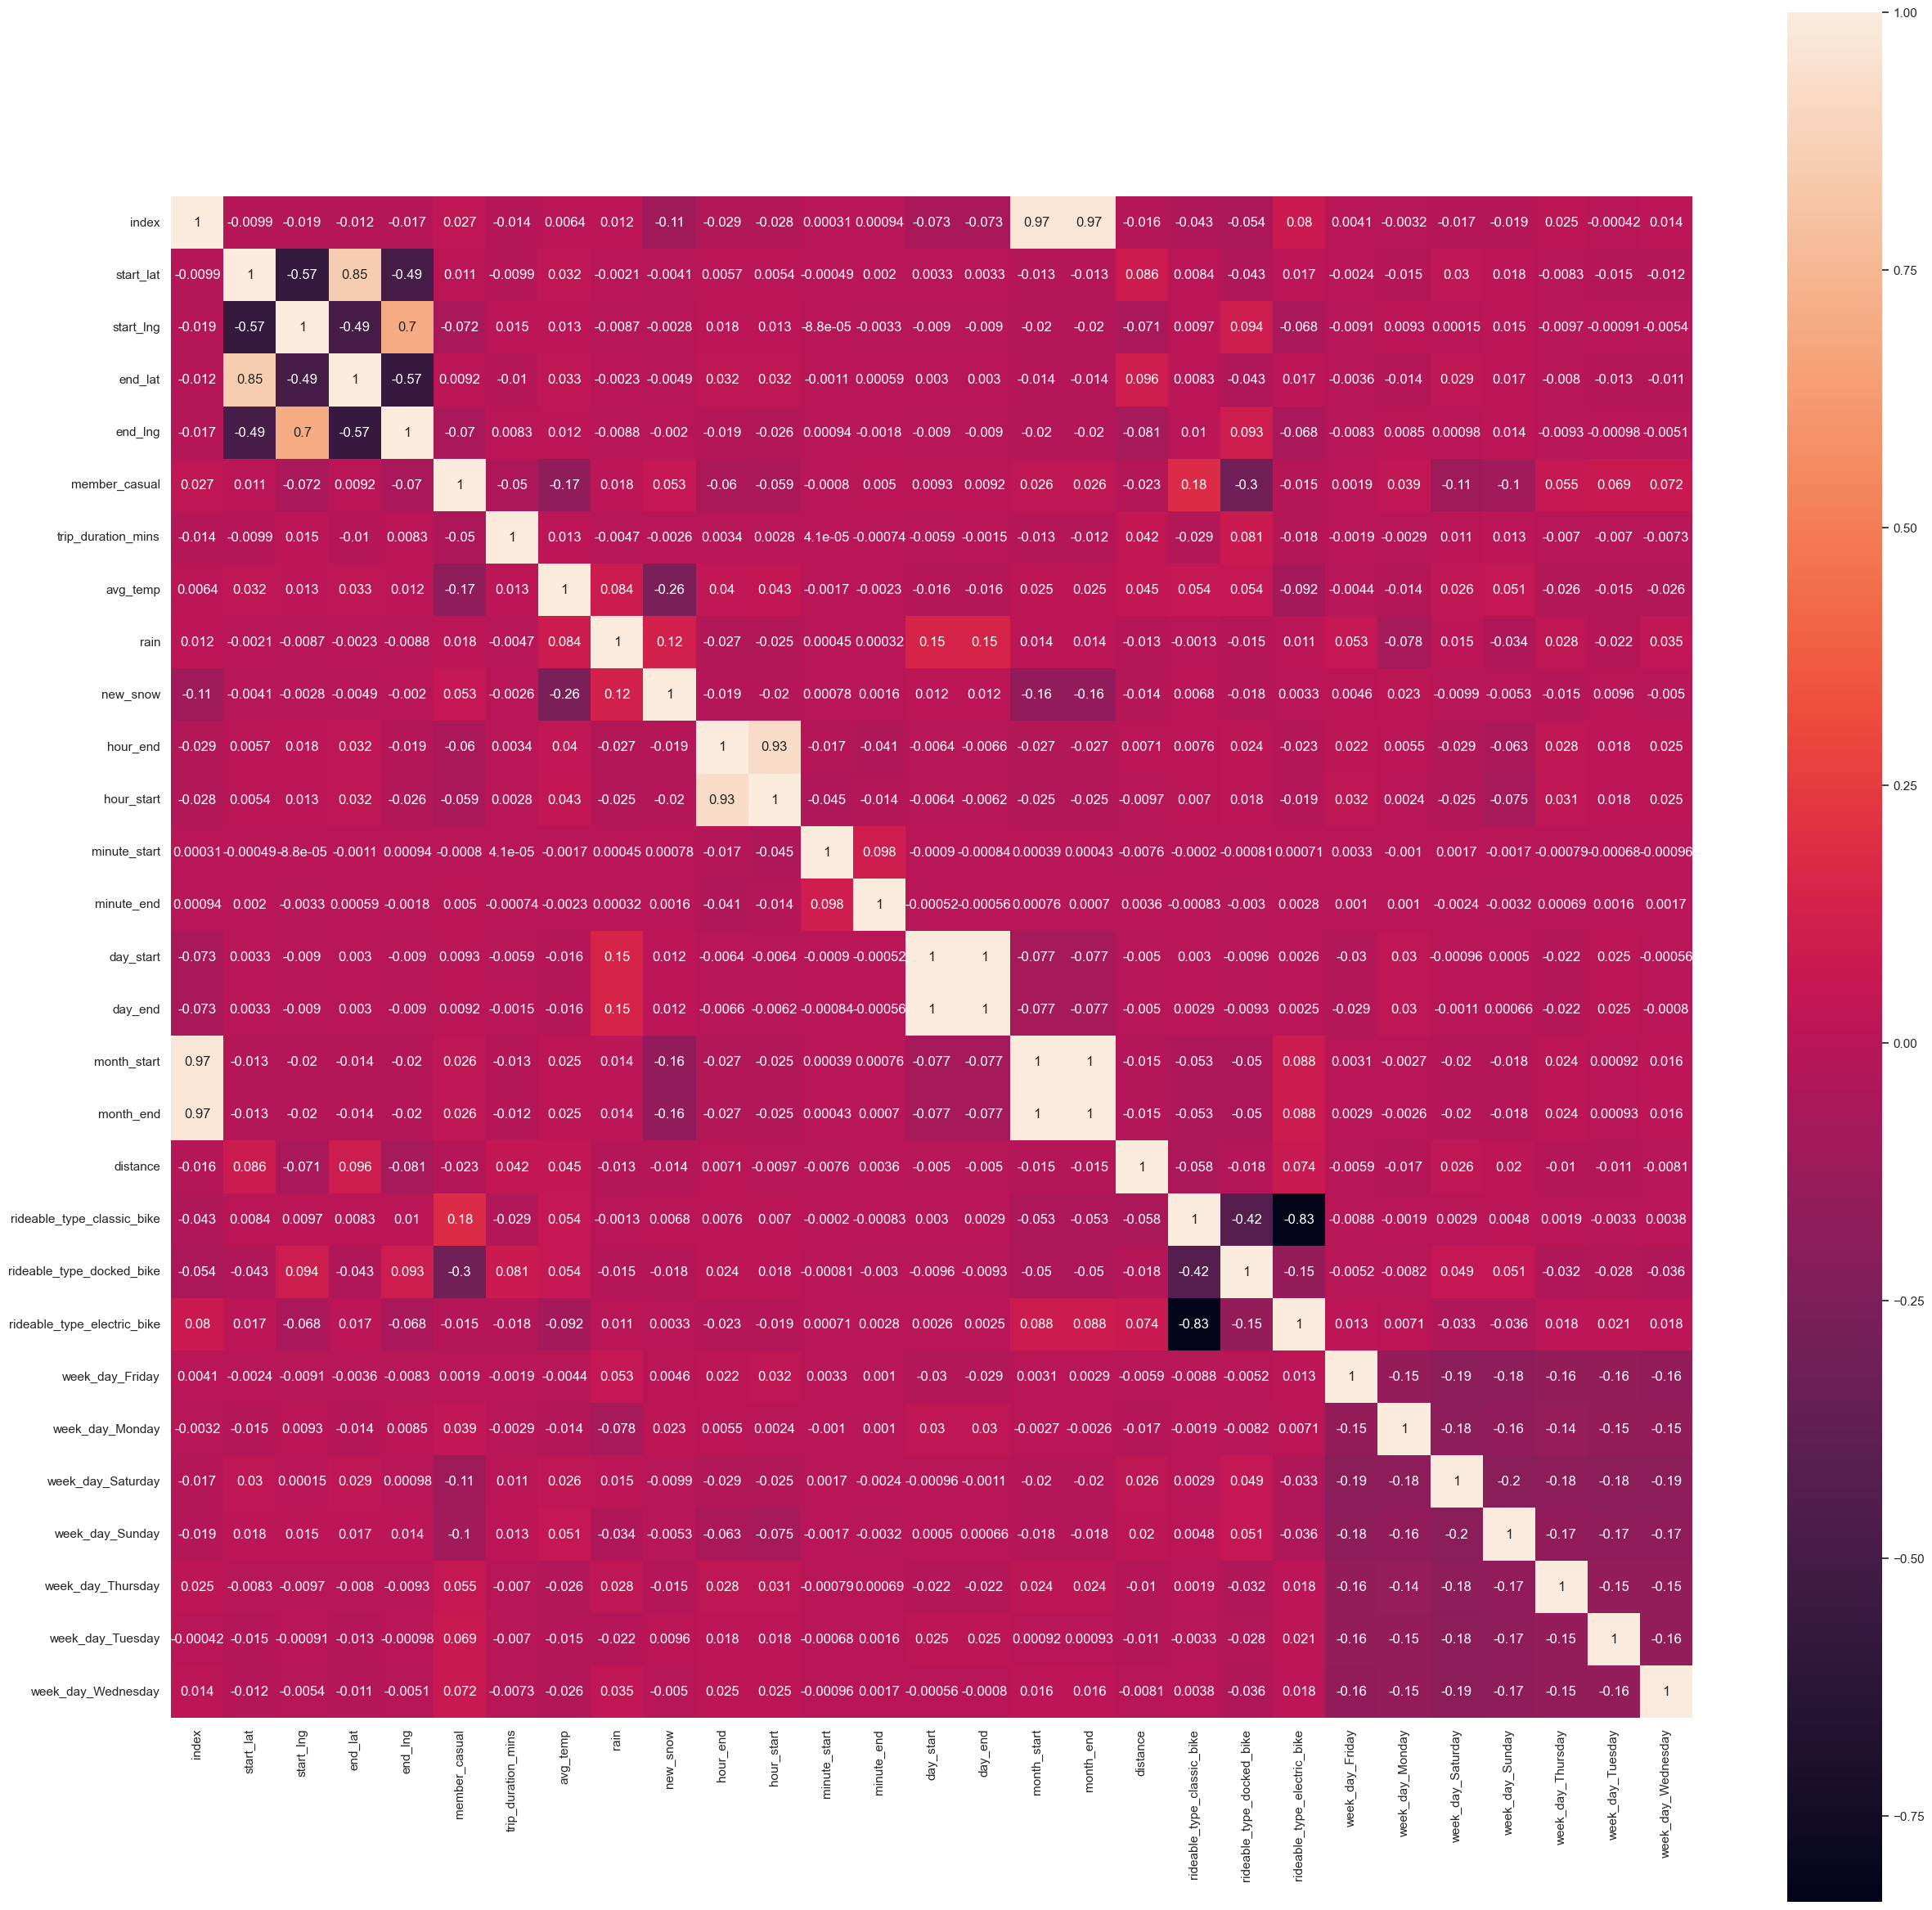

In [8]:
corr = df_2021.corr()

fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(corr, annot = True, square = True)
ax.set_ylim(len(corr)+0, -0)

plt.show()

The most correlated variable is rideabletype_classic_bike with .18.

In [9]:
# train test split
X = df_2021.drop(['member_casual'], axis = 1)
y = df_2021.member_casual


# Feature Imporatnce


What is Mutual Information: Mutual information is like looking at how things are connected. It helps us see how two things depend on each other, using a measure called entropy. In machine learning, we use it to figure out how much one thing is connected to another thing. When the mutual information value is high, it means those things are closely connected, and this can be useful for predicting something in the future.

In [10]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[0.18283201 0.05575948 0.05334965 0.05855637 0.05574174 0.06459038
 0.0339852  0.08524119 0.00190417 0.05635522 0.05350941 0.00965237
 0.00966327 0.01988161 0.01973088 0.09319876 0.09312371 0.09764195
 0.16970463 0.07313927 0.06766243 0.03324732 0.02657037 0.0543502
 0.04355228 0.02959098 0.03233569 0.03380352]


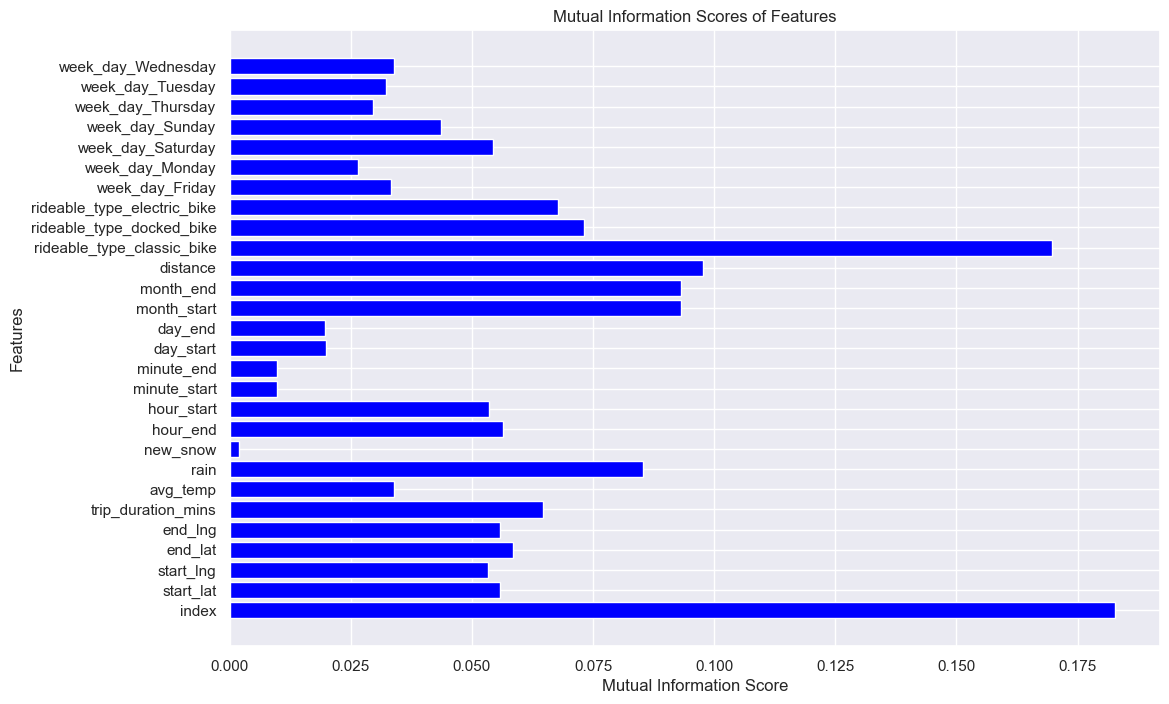

In [11]:
feature_names = X.columns
plt.figure(figsize=(12, 8))
plt.barh(feature_names, mi_score, color='blue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores of Features')
plt.show()

## Modeling

### I am going to compare the next 5 models:
- Logistic regression
- Naive Bays
- K-nearest Neighbor
- Gradient Boosting 
- Random Forrest

The class balance is 54.7% vs 45.3% between member and casual so I am using the data without oversampling/resampling techniques.

Since there is a significantly large number of data, I am going to sample subsets from the dataset for model selection purpose.

In [10]:
# Split full training set into smaller training subset and validation subset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split the training subset into a smaller subset for initial model comparison
# Set the train_size parameter to specify the proportion of data to keep
X_train_subset, X_val_subset, y_train_subset, y_val_subset = train_test_split(X_train, y_train, train_size=0.2, random_state=42)


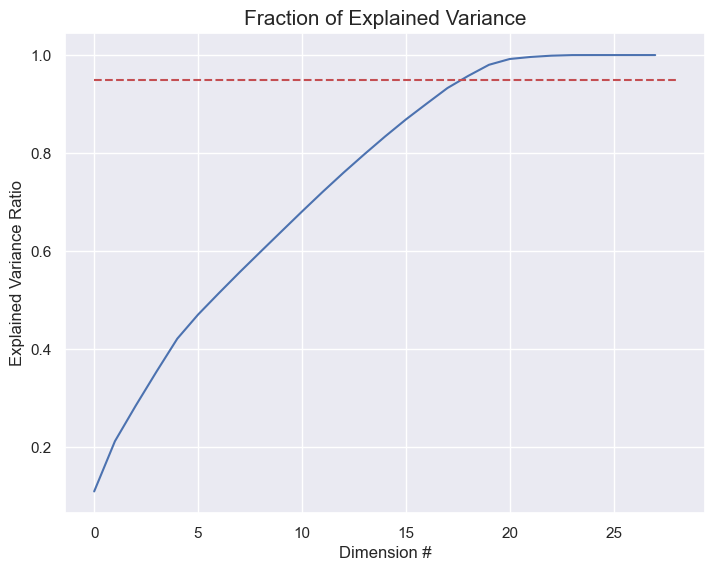

In [11]:
# choose the optimal number of components for PCA
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)

# plot explained variance ratio to choose the optimal number of components
pca = PCA(n_components = X_train_scaled.shape[1], random_state = 42)
pca.fit_transform(X_train_scaled)

features = range(pca.n_components_)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(features, np.cumsum(pca.explained_variance_ratio_))
ax.hlines(y = 0.95, xmin = 0, xmax = X_train_scaled.shape[1], color = 'r', linestyles = 'dashed')
ax.set_title('Fraction of Explained Variance', fontsize = 15)
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xticks(np.arange(0, pca.n_components_ + 1, 5.0))
plt.show()

In [12]:
train_score_f1 = []
cv_score_f1 = []
test_score_f1 = []
training_time = []

def model_building(model_input, model_name):

    # define which resampling method and which ML model to use in the pipeline
    scaler = StandardScaler()
    pca = PCA(n_components = 17)
    model = model_input

    # define the pipeline
    pipeline = Pipeline([('Scaler', scaler), ('PCA', pca),('Classifier', model)])
    
    # fit the data and get the train score/training time
    start = time.time()
    pipeline.fit(X_train_subset, y_train_subset)
    stop = time.time()
    y_pred_train = pipeline.predict(X_train_subset)
    train_score_f1.append(f1_score(y_train_subset, y_pred_train))
    
    # training time
    train_time = stop - start
    training_time.append(train_time)

    # cv score
    cv_score_f1.append(cross_val_score(model, X_train_subset, y_train_subset, cv = 3, n_jobs=1, scoring = 'f1').mean())
    
    # predict
    y_pred = pipeline.predict(X_val_subset)
    test_score_f1.append(f1_score(y_val_subset, y_pred))
    
    # track progress
    print('Done')

    return pipeline

In [13]:
logreg = model_building(LogisticRegression(random_state = 42, n_jobs=-1), 'Logistic Regression')
NB = model_building(GaussianNB(), 'Naive Bayes')
KNN = model_building(KNeighborsClassifier(n_neighbors = 3, n_jobs=-1), 'KNN')
rdmf = model_building(RandomForestClassifier(random_state = 42, n_jobs=-1), 'Random Forrest')
gbm = model_building(GradientBoostingClassifier(random_state = 42), 'Gradient Boosting Classifier')

Done
Done
Done
Done
Done


In [14]:
# take a look at the scores and go back to tune the hyperparameters if see any indication of overfitting or underfitting
classifiers = ['Logistic Regression', 'Naive Bayes', 'KNN','Random Forrest','Gradient Boosting']
result = pd.DataFrame({'Train F1': train_score_f1, 'CV F1': cv_score_f1, 'Test F1': test_score_f1, 'Training Time': training_time}, index = classifiers)
result.sort_values(by = 'CV F1', ascending = False)

,Train F1,CV F1,Test F1,Training Time
Random Forrest,0.999998,0.771756,0.750309,264.455928
Gradient Boosting,0.741486,0.766272,0.740366,956.791963
Naive Bayes,0.712693,0.713235,0.712397,7.234429
Logistic Regression,0.734805,0.707356,0.734453,13.617479
KNN,0.836649,NaN,0.689685,6.655074


<Figure size 640x480 with 0 Axes>

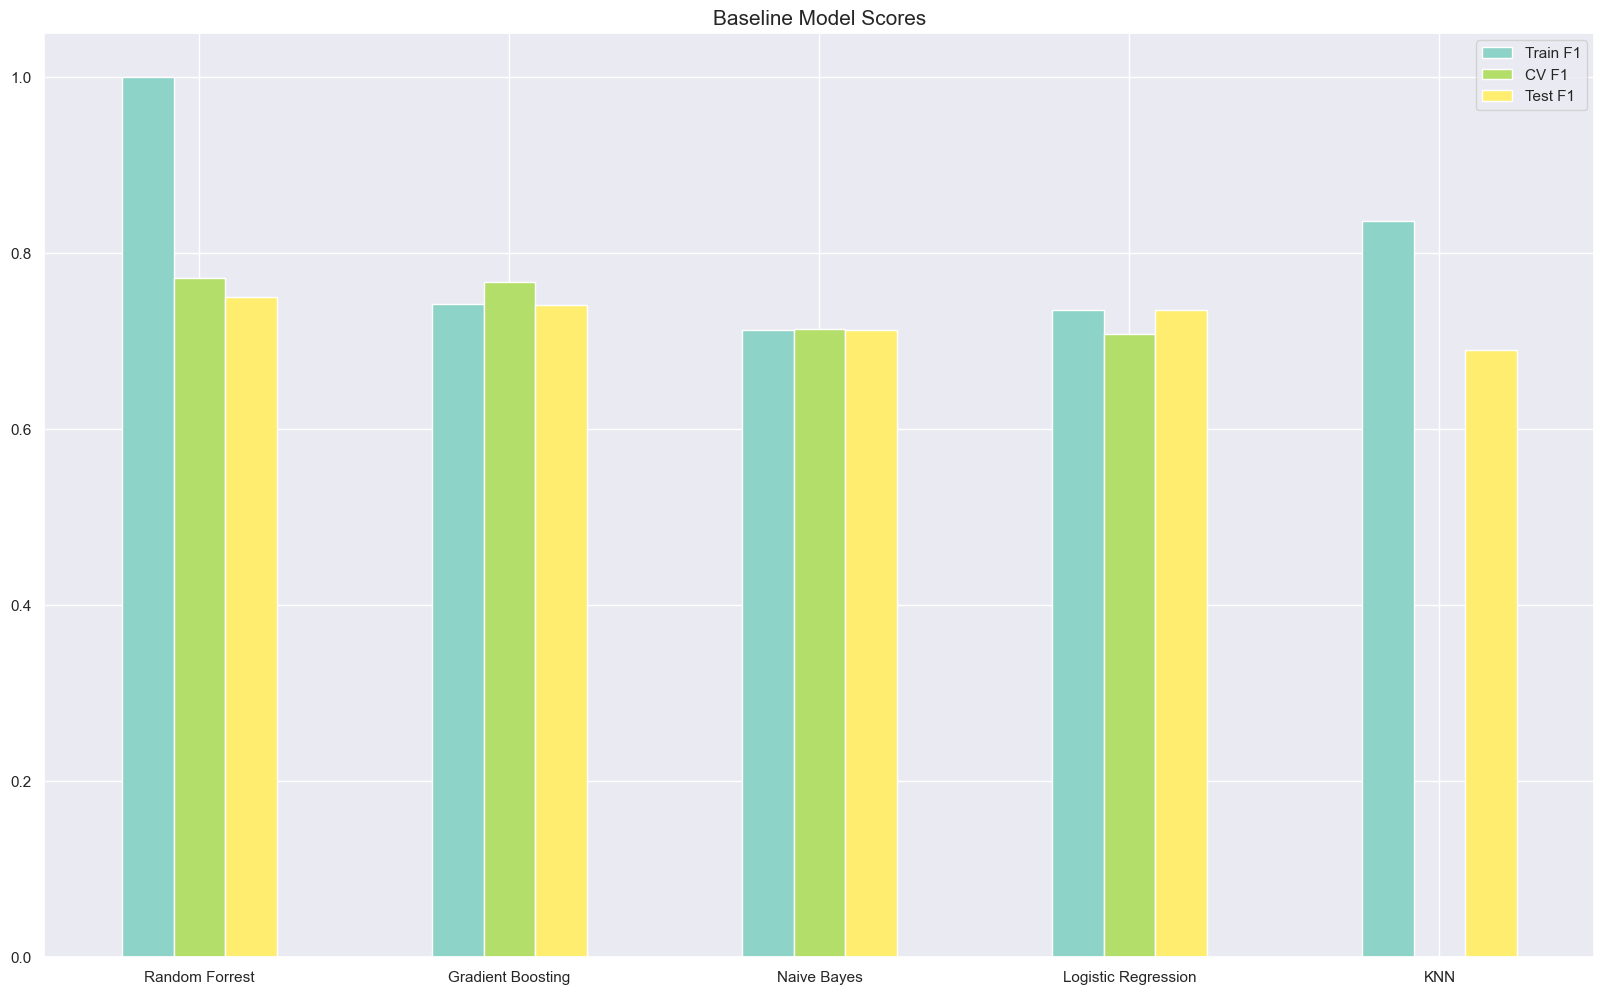

In [15]:
#Visualize the classification report
base_score = result.iloc[:, 0:3].sort_values(by = 'CV F1', ascending = False)

fig = plt.figure()

base_score.plot.bar(rot=0, colormap = 'Set3', figsize=(20,12))
plt.title('Baseline Model Scores', fontsize = 15)

fig = plt.gcf()
fig.savefig('base_score.png', bbox_inches = 'tight')

plt.show()

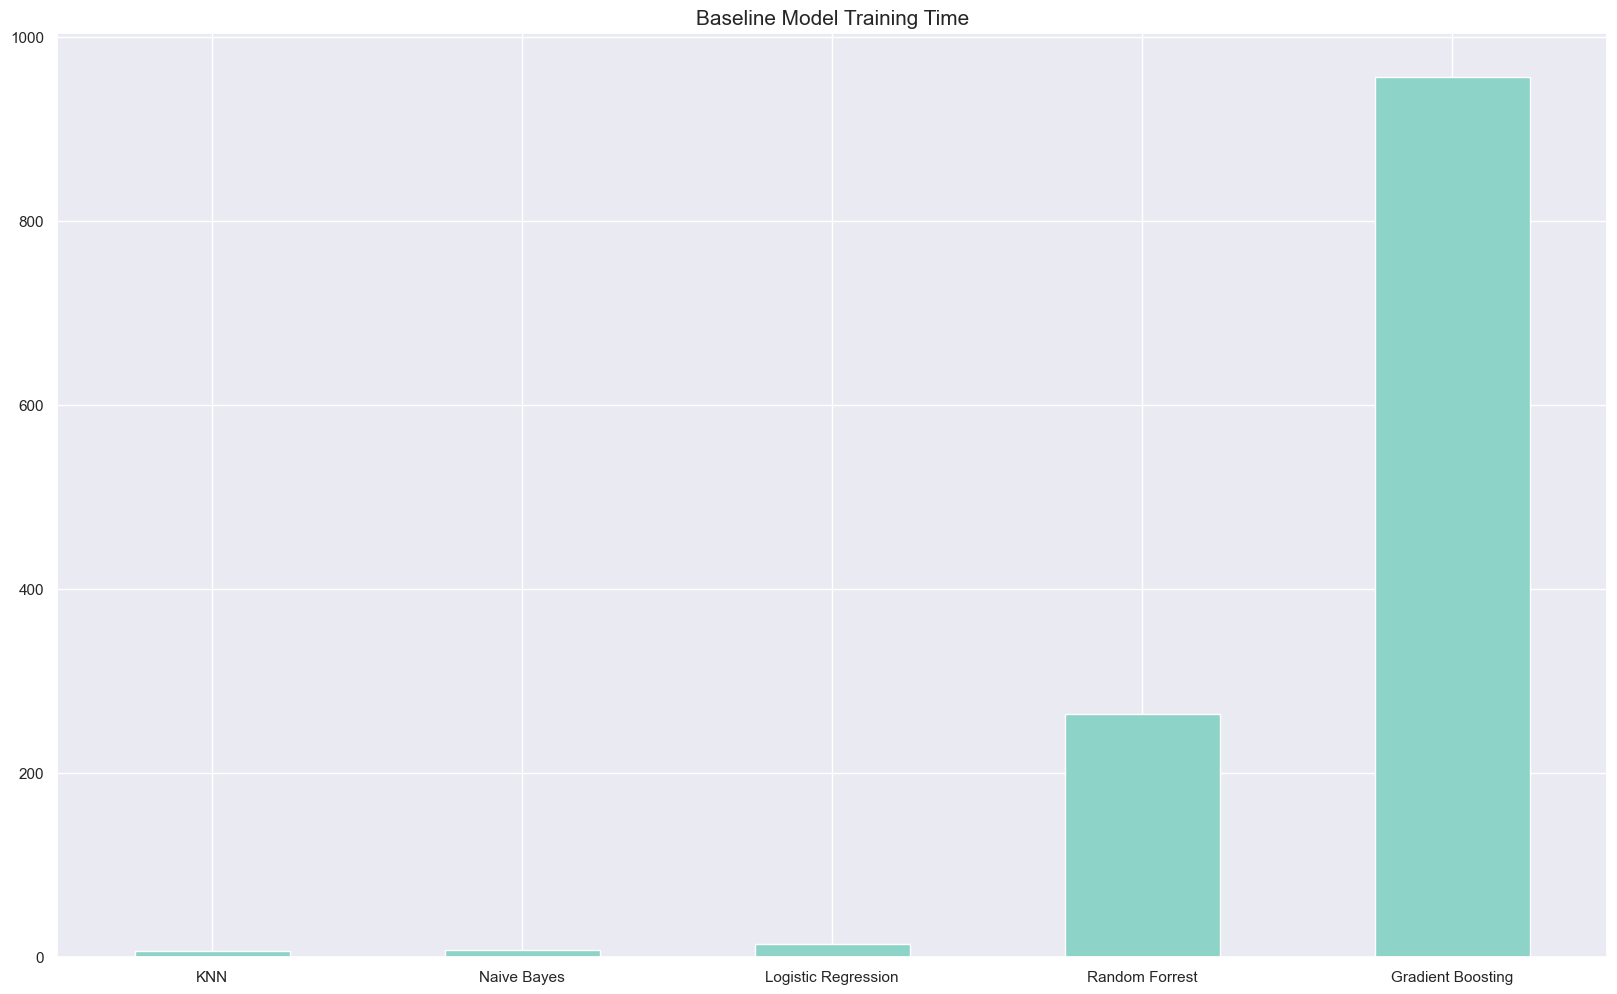

In [16]:
# visualize the training time
base_time = result.iloc[:, 3].sort_values()

fig = plt.figure()

base_time.plot.bar(rot=0, colormap = 'Set3', figsize=(20,12))
plt.title('Baseline Model Training Time', fontsize = 15)

fig = plt.gcf()
fig.savefig('base_time.png', bbox_inches = 'tight')

plt.show()

In [19]:
# Visualize the classification report
def classification_report_viz(model, title, file):
    y_pred = model.predict(X_val_subset)
    class_report = classification_report(y_val_subset, y_pred, output_dict=True)
    df = pd.DataFrame(class_report).iloc[:-1, :2].T
    
    fig, ax = plt.subplots(figsize = (6, 2))
    sns.heatmap(df, annot=True)
    plt.title(title)
    ax.set_ylim(len(df)+0, -0)
    
    fig.savefig(file, bbox_inches = 'tight')
    
    plt.show()

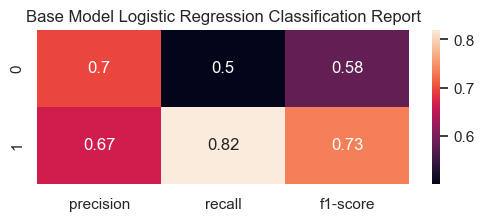

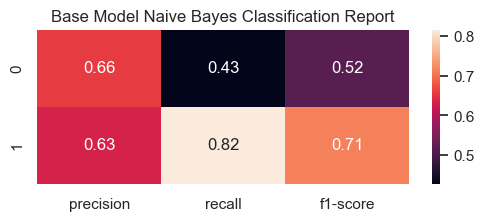

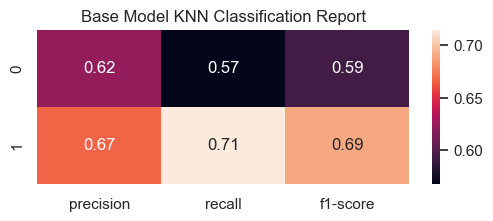

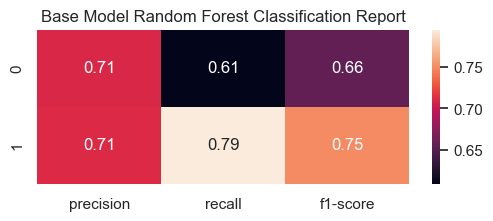

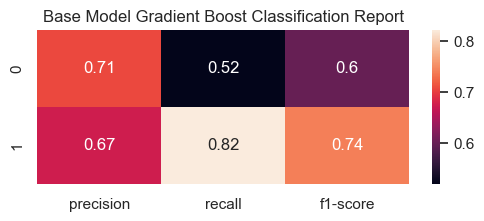

In [20]:
# visualize classification report on the test set
classification_report_viz(logreg, 'Base Model Logistic Regression Classification Report', 'bm_lr.png')
classification_report_viz(NB, 'Base Model Naive Bayes Classification Report', 'bm_nb.png')
classification_report_viz(KNN, 'Base Model KNN Classification Report', 'bm_knn.png')
classification_report_viz(rdmf, 'Base Model Random Forest Classification Report', 'bm_rf.png')
classification_report_viz(gbm, 'Base Model Gradient Boost Classification Report', 'bm_gbm.png')

In [ ]:
from sklearn.metrics import roc_curve

def roc_curve_viz(models, model_names): 
    plt.figure(figsize=(8, 6))  # Create a larger plot
    
    for model, model_name in zip(models, model_names):
        # Get predicted probabilities
        target_probabilities = model.predict_proba(X_val_subset)[:,1]
        # Create true and false positive rates
        false_positive_rate, true_positive_rate, _ = roc_curve(y_val_subset, target_probabilities)
        # Plot ROC curve with label
        plt.plot(false_positive_rate, true_positive_rate, label=model_name)

    # Plot diagonal dashed line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    
    plt.title("ROC Curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend()
    plt.show()

models = [logreg, NB, KNN, rdmf, gbm]
model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting']
roc_curve_viz(models, model_names)


## Model selected: Random Forrest